In [8]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [9]:
raghaav=pd.read_csv('Netflix.csv')

In [10]:
raghaav.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [11]:
raghaav[raghaav.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [12]:
raghaav.drop_duplicates(inplace=True)

In [13]:
raghaav.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<Axes: >

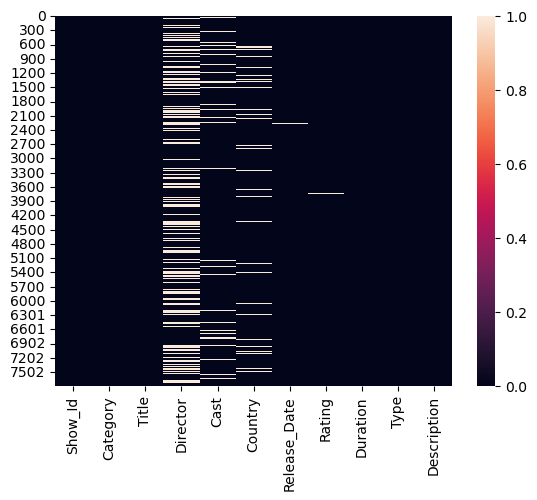

In [14]:
sns.heatmap(raghaav.isnull())

In [15]:
raghaav.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [16]:
raghaav['date_time'] = pd.to_datetime(raghaav['Release_Date'], errors='coerce')

In [17]:
raghaav.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_time
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23


In [18]:
raghaav.drop('Release_Date', axis=1,inplace=True)

In [19]:
raghaav.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,date_time
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23


In [20]:
raghaav['date_time'].dt.year.value_counts()

date_time
2019.0    2136
2020.0    2008
2018.0    1661
2017.0    1201
2016.0     432
2021.0     117
2015.0      79
2014.0      24
2011.0      13
2013.0      10
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: count, dtype: int64

<Axes: xlabel='date_time'>

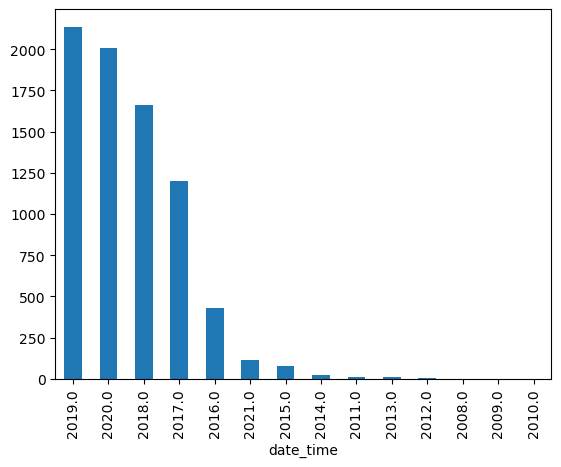

In [21]:
raghaav['date_time'].dt.year.value_counts().plot(kind='bar')

In [22]:
# How many tv shows and how many movies
raghaav.groupby('Category').Category.count()

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

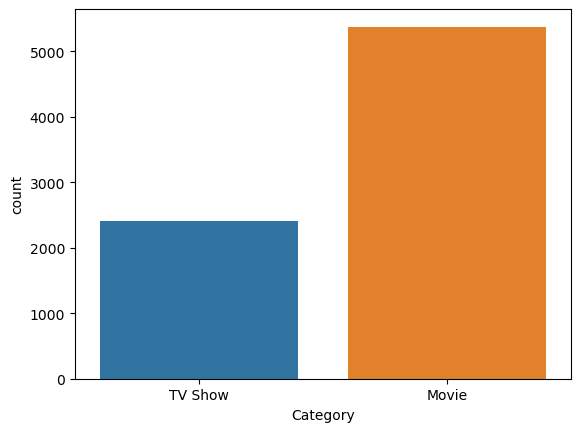

In [23]:
import matplotlib.pyplot as plt
sns.countplot(x='Category', data=raghaav)
plt.show()

In [24]:
raghaav.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,date_time
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23


In [25]:
raghaav['New_year']=raghaav['date_time'].dt.year

In [26]:
raghaav.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,date_time,New_year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0


In [27]:
#Filtering

raghaav[(raghaav['Category']== 'Movie')&(raghaav['New_year']==2020)]

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,date_time,New_year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020-06-01,2020.0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19,2020.0
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",2020-09-08,2020.0
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",2020-07-01,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7762,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...,2020-05-19,2020.0
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,2020.0
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,2020.0
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25,2020.0


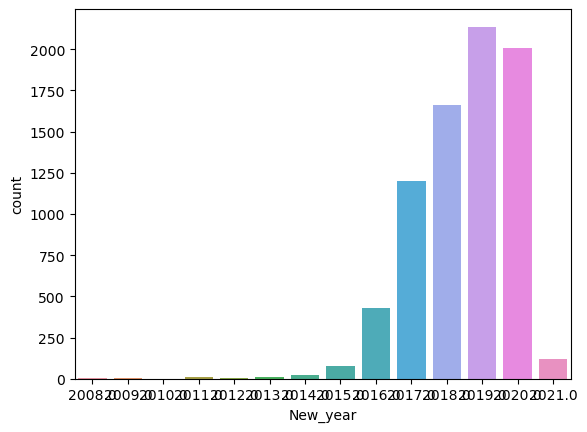

In [28]:
sns.countplot(x='New_year', data=raghaav)
plt.show() 

In [29]:
raghaav[(raghaav['Category']=='TV Show')&(raghaav['Country']=='India') ]['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

In [30]:
raghaav['Country'].value_counts()

Country
United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 681, dtype: int64

In [31]:
raghaav[(raghaav['Category']=='Movie') & (raghaav['Type']=='Comedies') |(raghaav['Country']=='United States') ]

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,date_time,New_year
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019.0
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,2017-10-20,2017.0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7760,s7759,Movie,Zack and Miri Make a Porno,Kevin Smith,"Seth Rogen, Elizabeth Banks, Craig Robinson, J...",United States,R,101 min,"Comedies, Independent Movies, Romantic Movies",Zack and Miri make and star in an adult film t...,2018-10-01,2018.0
7773,s7772,Movie,Zion,Floyd Russ,Zion Clark,United States,TV-PG,12 min,"Documentaries, Sports Movies",Born without legs and stuck in foster care for...,2018-08-10,2018.0
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,2019.0
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,2019.0


In [32]:
raghaav[(raghaav["Cast"]=='Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,date_time,New_year


In [33]:
raghaav_new=raghaav.dropna()

In [34]:
raghaav_new[raghaav_new['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,date_time,New_year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019.0


In [35]:
#different rating defined by netflix
raghaav.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,date_time,New_year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0


In [36]:
raghaav['Rating'].nunique()

14

In [37]:
raghaav["Rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [38]:
raghaav[(raghaav["Category"]=='Movie')&(raghaav['Rating']=='TV-14')].shape

(1272, 12)

In [39]:
raghaav[(raghaav["Category"]=='Movie')&(raghaav['Rating']=='TV-14')& (raghaav['Country']== 'Canada')]

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,date_time,New_year
30,s31,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,2020-02-05,2020.0
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019-04-10,2019.0
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...,2018-12-27,2018.0
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...,2018-07-01,2018.0
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...,2017-11-12,2017.0
3956,s3957,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...,2019-10-14,2019.0
5336,s5336,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...,2017-08-22,2017.0
5393,s5393,Movie,Sardaar ji,Rohit Jugraj,"Diljit Dosanjh, Neeru Bajwa, Mandy Takhar, Jas...",Canada,TV-14,140 min,"Comedies, International Movies, Music & Musicals",When a palatial wedding venue turns out to be ...,2017-12-01,2017.0
6062,s6062,Movie,The Accountant of Auschwitz,Matthew Shoychet,NaN,Canada,TV-14,78 min,"Documentaries, International Movies","Decades after WWII, a former SS officer stands...",2019-07-01,2019.0
7025,s7024,Movie,The Wrong Babysitter,George Mendeluk,"Daphne Zuniga, Seann Gallagher, Lisa Marie Car...",Canada,TV-14,89 min,Thrillers,A widow searches for her missing teenage daugh...,2019-06-18,2019.0


In [40]:
raghaav[(raghaav['Category']=="TV Show")& (raghaav['Rating']=='R')&(raghaav['New_year']>2018)]

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,date_time,New_year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019.0


In [41]:
raghaav['Duration'].nunique()

216

In [42]:
raghaav[['Minutes','Unit']]= raghaav['Duration'].str.split(' ', expand=True )

In [43]:
raghaav.head()

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,date_time,New_year,Minutes,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0,78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0,80,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0,123,min


In [44]:
raghaav.dtypes

Show_Id                object
Category               object
Title                  object
Director               object
Cast                   object
Country                object
Rating                 object
Duration               object
Type                   object
Description            object
date_time      datetime64[ns]
New_year              float64
Minutes                object
Unit                   object
dtype: object

In [45]:
raghaav['Minutes'] = raghaav['Minutes'].astype(int)


In [46]:
raghaav.Minutes.dtypes

dtype('int32')

In [47]:
raghaav['Minutes'].max()

312

In [48]:
raghaav['Minutes'].min()


1

In [49]:
 raghaav_TVshow= raghaav[raghaav['Category']=="TV Show"]

In [50]:
raghaav_TVshow.head()

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,date_time,New_year,Minutes,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,4,Seasons
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017.0,1,Season
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018-11-30,2018.0,1,Season
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019-05-17,2019.0,1,Season
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019-03-20,2019.0,1,Season


In [52]:
raghaav_TVshow.Country.value_counts()

Country
United States                                                705
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
India                                                         71
                                                            ... 
Canada, United States, United Kingdom, France, Luxembourg      1
United States, Italy                                           1
Chile, Italy                                                   1
Canada, United Kingdom                                         1
United States, France, South Korea, Indonesia                  1
Name: count, Length: 183, dtype: int64

In [53]:
raghaav.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,date_time,New_year,Minutes,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,93,min


In [54]:
raghaav.sort_values(by="New_year", ascending= False)

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,date_time,New_year,Minutes,Unit
5564,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia",PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021-01-01,2021.0,128,min
5919,s5919,Movie,Surf's Up,"Ash Brannon, Chris Buck","Shia LaBeouf, Jeff Bridges, Zooey Deschanel, J...",United States,PG,86 min,"Children & Family Movies, Comedies, Sports Movies",This Oscar-nominated animated comedy goes behi...,2021-01-01,2021.0,86,min
980,s981,TV Show,Bling Empire,NaN,NaN,NaN,TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...,2021-01-15,2021.0,1,Season
1355,s1356,Movie,Chris Rock Total Blackout: The Tamborine Exten...,Chris Rock,Chris Rock,NaN,TV-MA,98 min,Stand-Up Comedy,"In this extended cut of his 2018 special, Chri...",2021-01-12,2021.0,98,min
5955,s5955,Movie,Taare Zameen Par,Aamir Khan,"Aamir Khan, Darsheel Safary, Tanay Chheda, Tis...",India,PG,162 min,"Dramas, International Movies",When daydreamer Ishaan is sent to boarding sch...,2021-01-10,2021.0,162,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,s6951,TV Show,The Tudors,NaN,"Jonathan Rhys Meyers, Henry Cavill, James Frai...","Ireland, Canada, United States, United Kingdom",TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...,NaT,NaN,4,Seasons
6998,s6997,TV Show,The West Wing,NaN,"Martin Sheen, Rob Lowe, Allison Janney, John S...",United States,TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...,NaT,NaN,7,Seasons
7448,s7447,TV Show,Vroomiz,NaN,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ...",NaT,NaN,3,Seasons
7524,s7523,TV Show,Weird Wonders of the World,NaN,Chris Packham,United Kingdom,TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...,NaT,NaN,2,Seasons
